In [34]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Setting plot styles
sns.set(style='whitegrid')
%matplotlib inline

In [36]:
# Loading the dataset
df = pd.read_csv('C:\\Users\\aparn\\Downloads\\data.csv', encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [37]:
# Displaying first few rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [38]:
# Checking the shape of the dataset
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')


Dataset contains 541909 rows and 8 columns.


In [39]:
# Overview of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [40]:
# Statistical summary of numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [41]:
# Checking for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print(missing_values)

CustomerID     135080
Description      1454
dtype: int64


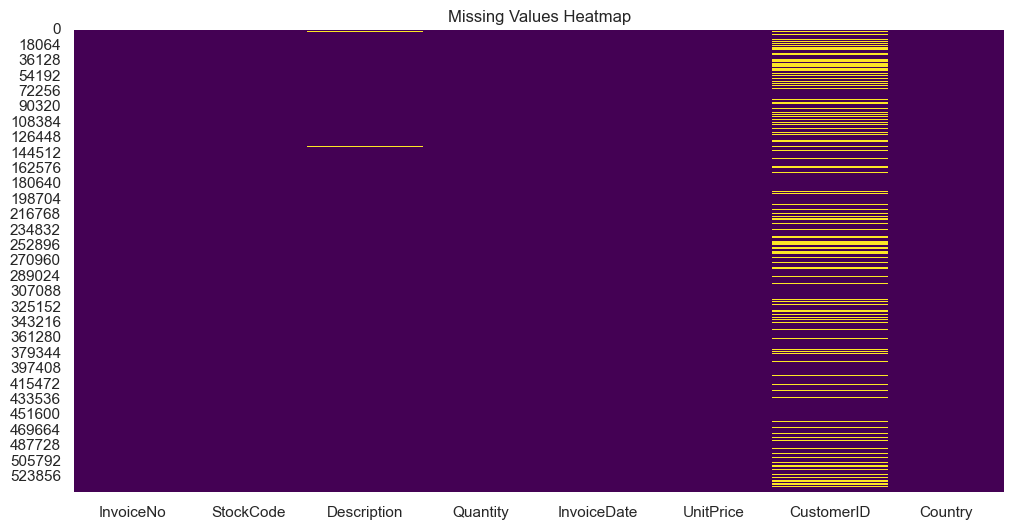

In [26]:
# Visualizing missing values using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [42]:
# Imputing missing numerical values with median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)


In [43]:
# Imputing missing categorical values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [44]:
# Verifying no missing values remain
print(df.isnull().sum())


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [16]:
df['amount_spent'] = df['Quantity'] * df['UnitPrice']


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     541909 non-null  object 
 1   StockCode     541909 non-null  object 
 2   Description   541909 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   InvoiceDate   541909 non-null  object 
 5   UnitPrice     541909 non-null  float64
 6   CustomerID    541909 non-null  float64
 7   Country       541909 non-null  object 
 8   amount_spent  541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [18]:
df_new = df[['InvoiceNo', 'InvoiceDate', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'amount_spent', 'CustomerID', 'Country']]


In [19]:
# Ensure 'df_new' is a copy to avoid SettingWithCopyWarning
df_new = df[['InvoiceNo', 'InvoiceDate', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'amount_spent', 'CustomerID', 'Country']].copy()

# Convert 'InvoiceDate' to datetime format
df_new['invoice_date'] = pd.to_datetime(df_new['InvoiceDate'])

# Update 'year_month' column or insert if it doesn't exist
df_new['year_month'] = df_new['invoice_date'].map(lambda x: 100*x.year + x.month)

# Update 'month' column or insert if it doesn't exist
df_new['month'] = df_new['invoice_date'].dt.month

# Update 'day' column or insert if it doesn't exist (where Monday = 1 and Sunday = 7)
df_new['day'] = df_new['invoice_date'].dt.dayofweek + 1

# Update 'hour' column or insert if it doesn't exist
df_new['hour'] = df_new['invoice_date'].dt.hour


In [20]:
# Display the first few rows to verify the changes
df_new.head()


,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,amount_spent,CustomerID,Country,invoice_date,year_month,month,day,hour
0,536365,12/1/2010 8:26,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom,2010-12-01 08:26:00,201012,12,3,8
1,536365,12/1/2010 8:26,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom,2010-12-01 08:26:00,201012,12,3,8
2,536365,12/1/2010 8:26,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom,2010-12-01 08:26:00,201012,12,3,8
3,536365,12/1/2010 8:26,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom,2010-12-01 08:26:00,201012,12,3,8
4,536365,12/1/2010 8:26,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom,2010-12-01 08:26:00,201012,12,3,8


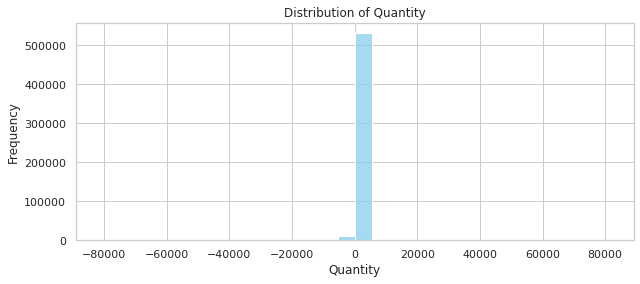

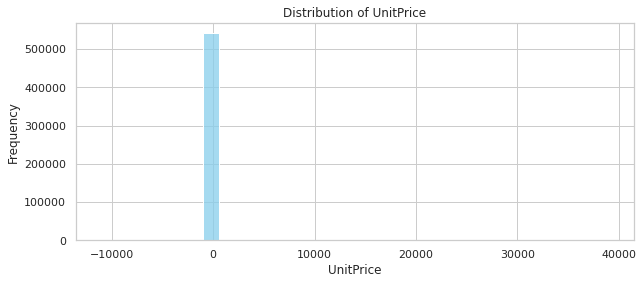

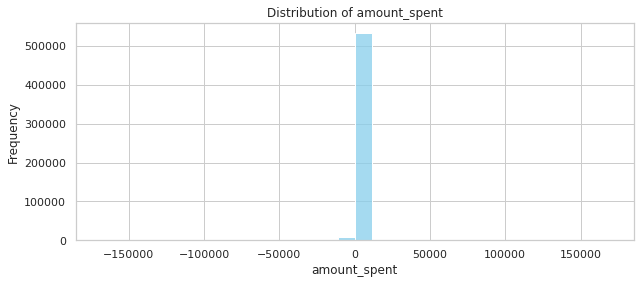

In [21]:
# List of numerical columns
num_cols = ['Quantity', 'UnitPrice', 'amount_spent']

# Plotting histograms
for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df_new[col], kde=False, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


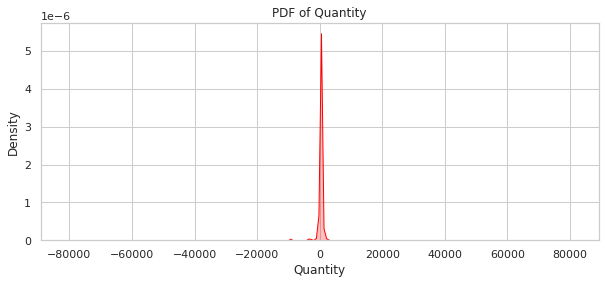

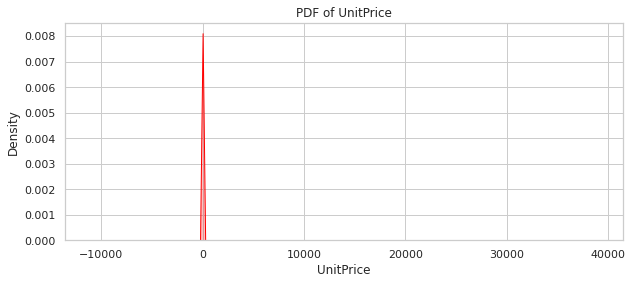

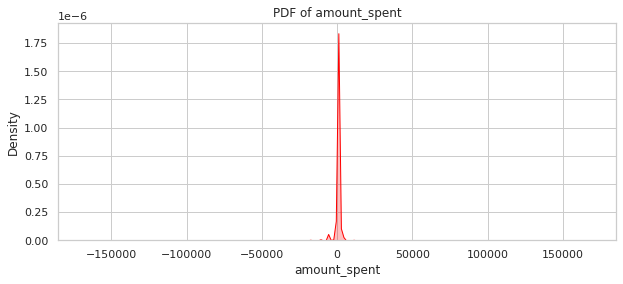

In [22]:
# Plotting PDFs
for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.kdeplot(df[col], shade=True, color='red')
    plt.title(f'PDF of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()


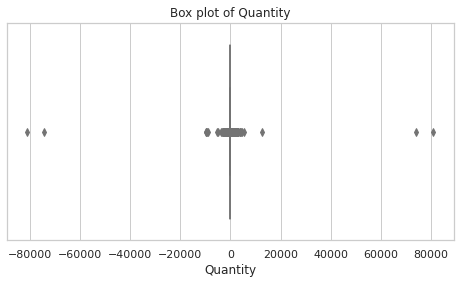

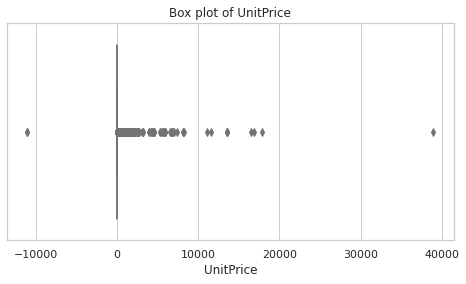

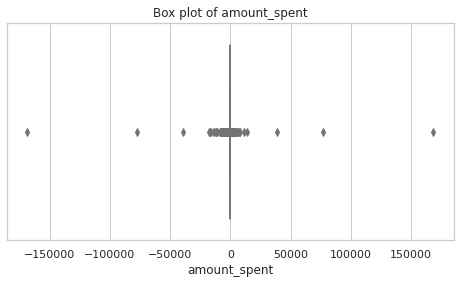

In [23]:
# Plotting box plots
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()


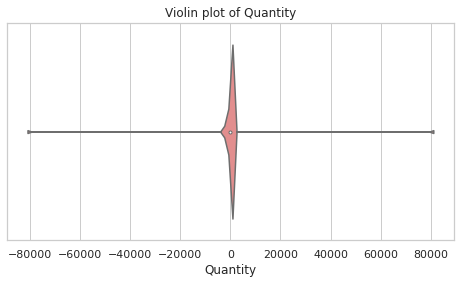

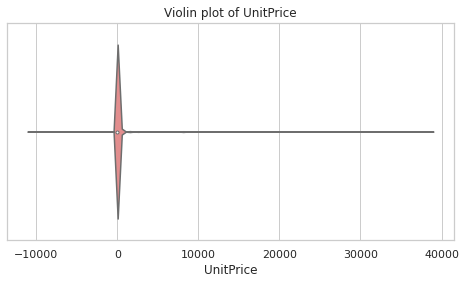

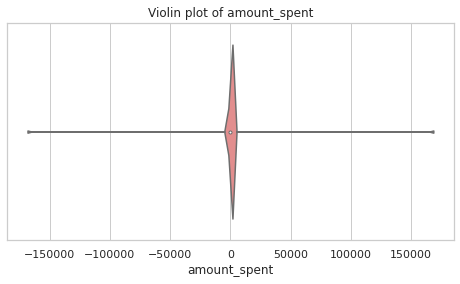

In [24]:
# Plotting violin plots
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.violinplot(x=df[col], color='lightcoral')
    plt.title(f'Violin plot of {col}')
    plt.xlabel(col)
    plt.show()


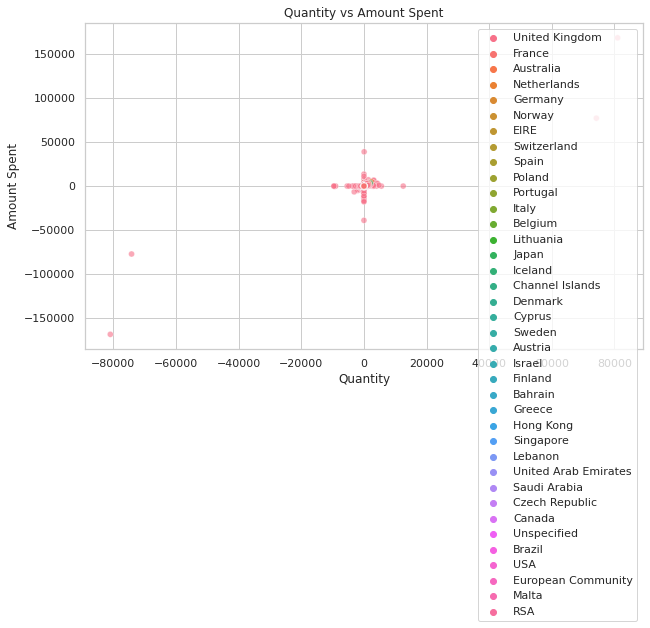

In [25]:
# Scatter plot between 'quantity' and 'amount_spent'
plt.figure(figsize=(10,6))
sns.scatterplot(x='Quantity', y='amount_spent', data=df, hue='Country', alpha=0.6)
plt.title('Quantity vs Amount Spent')
plt.xlabel('Quantity')
plt.ylabel('Amount Spent')
plt.legend(loc='upper right')
plt.show()


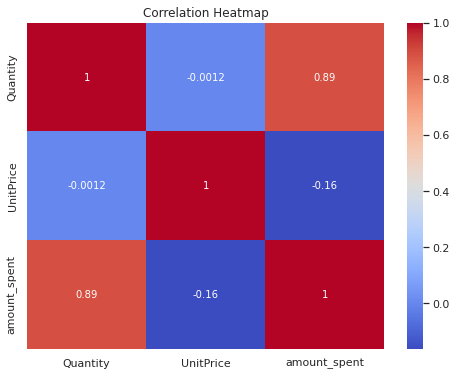

In [26]:
# Computing correlation matrix
corr = df[num_cols].corr()

# Plotting heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


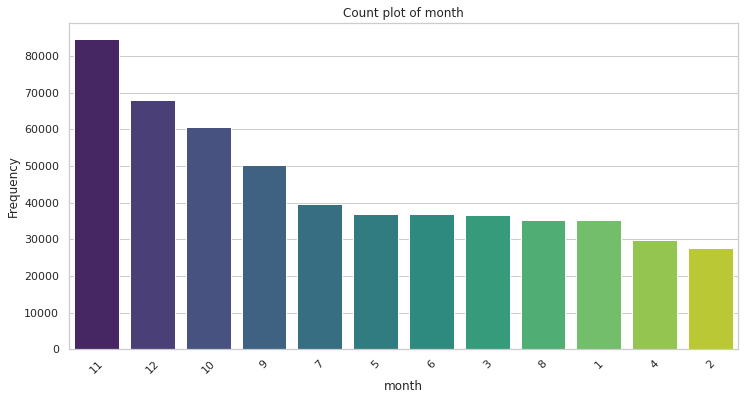

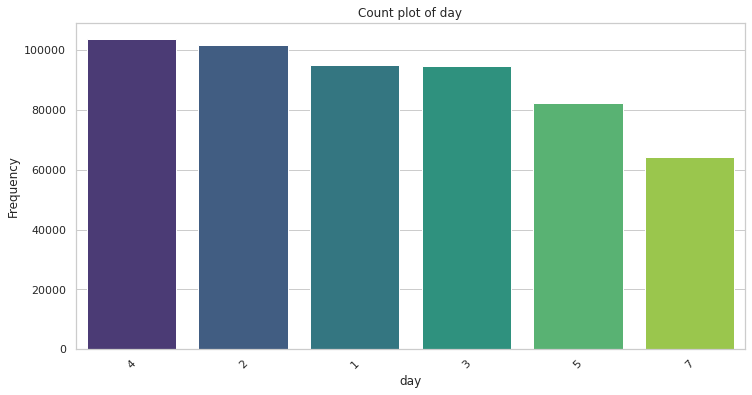

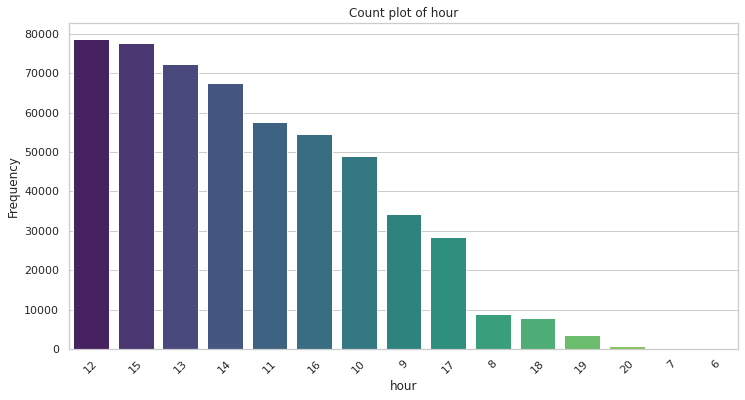

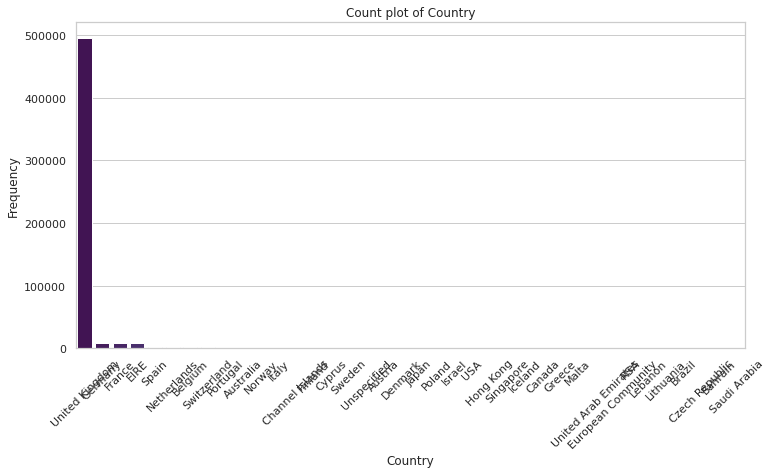

In [27]:
# List of categorical columns
cat_cols = ['month', 'day', 'hour', 'Country']

# Plotting count plots for categorical columns
for col in cat_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col, data=df_new, order=df_new[col].value_counts().index, palette='viridis')
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

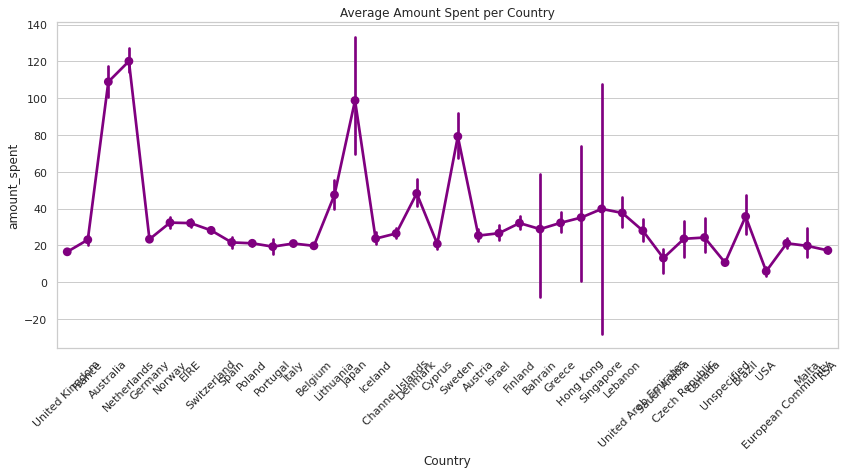

In [28]:
# Point plot of 'amount_spent' across different 'country'
plt.figure(figsize=(14,6))
sns.pointplot(x='Country', y='amount_spent', data=df, estimator=np.mean, color='purple')
plt.title('Average Amount Spent per Country')
plt.xticks(rotation=45)
plt.show()



In [29]:
# Function to detect outliers based on IQR
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Number of outliers in {col}: {outliers.shape[0]}')
    return outliers

# Detecting outliers in 'quantity'
outliers_quantity = detect_outliers('Quantity')

# Detecting outliers in 'unit_price'
outliers_unit_price = detect_outliers('UnitPrice')

# Detecting outliers in 'amount_spent'
outliers_amount_spent = detect_outliers('amount_spent')


Number of outliers in Quantity: 58619
Number of outliers in UnitPrice: 39627
Number of outliers in amount_spent: 44997


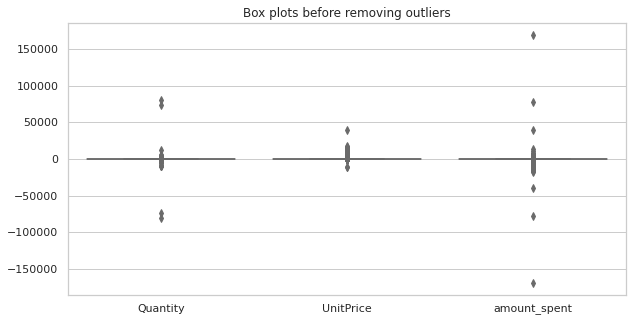

In [30]:
# Box plot before removing outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df[num_cols], palette='Set3')
plt.title('Box plots before removing outliers')
plt.show()


In [31]:
# Removing outliers function
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_clean

# Applying removal
df_no_outliers = df.copy()
for col in num_cols:
    df_no_outliers = remove_outliers(col)

# Checking shape after outlier removal
print(f'Dataset shape after removing outliers: {df_no_outliers.shape}')


Dataset shape after removing outliers: (496912, 9)


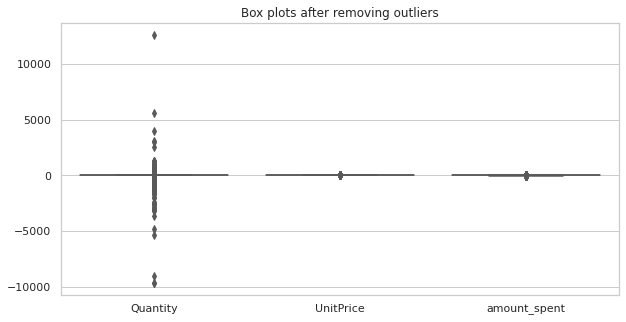

In [32]:
# Box plot after removing outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df_no_outliers[num_cols], palette='Set2')
plt.title('Box plots after removing outliers')
plt.show()


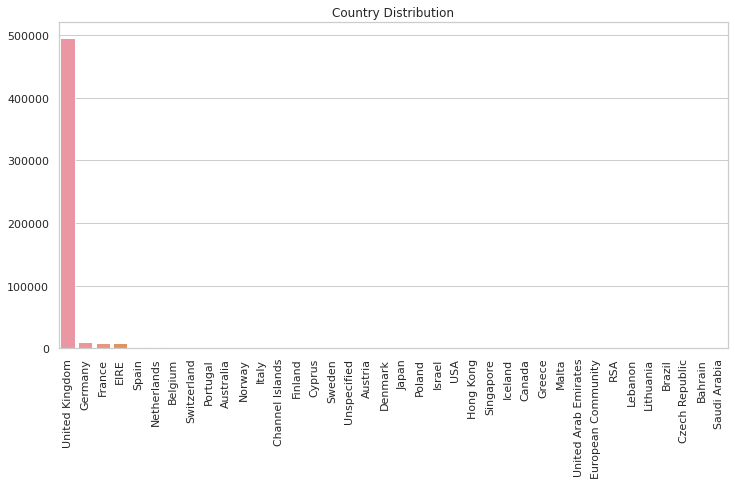

In [33]:
# Checking distribution of 'country'
country_counts = df['Country'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Country Distribution')
plt.xticks(rotation=90)
plt.show()


In [34]:
from sklearn.preprocessing import StandardScaler

# Initializing scaler
scaler = StandardScaler()

# Scaling numerical features
df_scaled = df_no_outliers.copy()
df_scaled[num_cols] = scaler.fit_transform(df_no_outliers[num_cols])

# Viewing scaled data
df_scaled[num_cols].head()


,Quantity,UnitPrice,amount_spent
0,0.005419,-0.176605,0.600119
1,0.005419,0.081414,1.190722
2,0.055811,-0.115172,1.385247
3,0.005419,0.081414,1.190722
4,0.005419,0.081414,1.190722


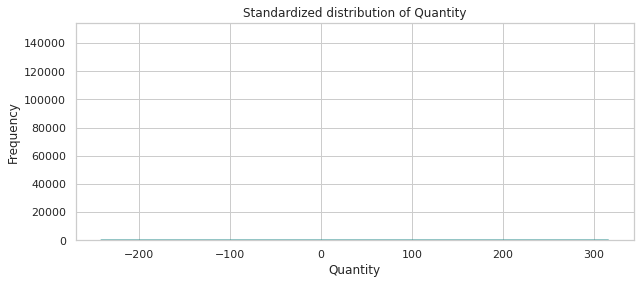

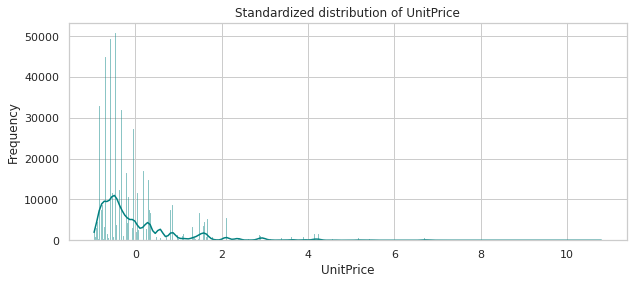

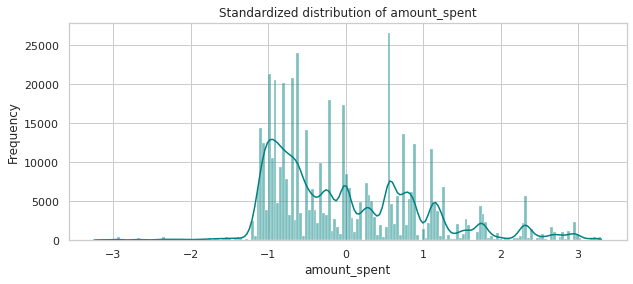

In [35]:
# Histograms after standardization
for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df_scaled[col], kde=True, color='teal')
    plt.title(f'Standardized distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [36]:
from sklearn.preprocessing import MinMaxScaler

# Initializing scaler
minmax_scaler = MinMaxScaler()

# Scaling numerical features
df_normalized = df_no_outliers.copy()
df_normalized[num_cols] = minmax_scaler.fit_transform(df_no_outliers[num_cols])

# Viewing normalized data
df_normalized[num_cols].head()


,Quantity,UnitPrice,amount_spent
0,0.433875,0.066649,0.587657
1,0.433875,0.088604,0.677818
2,0.433966,0.071877,0.707513
3,0.433875,0.088604,0.677818
4,0.433875,0.088604,0.677818


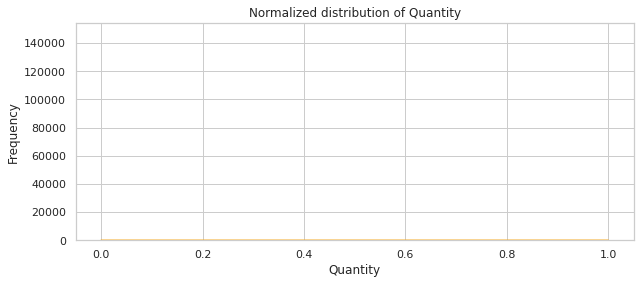

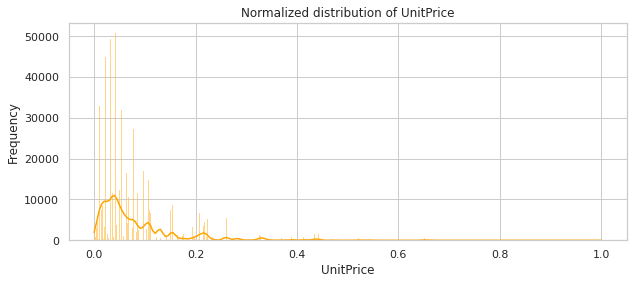

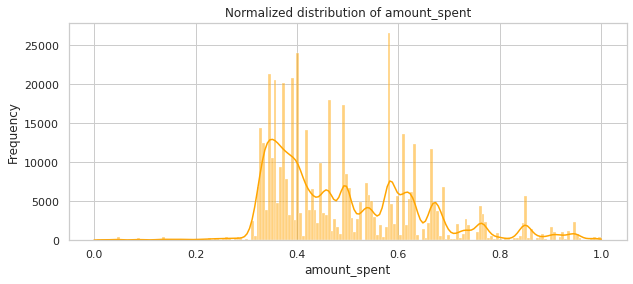

In [37]:
# Histograms after normalization
for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df_normalized[col], kde=True, color='orange')
    plt.title(f'Normalized distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [38]:
from sklearn.preprocessing import LabelEncoder

# Initializing label encoder
le = LabelEncoder()

# Applying label encoding to 'country'
df_encoded = df_no_outliers.copy()
df_encoded['country_encoded'] = le.fit_transform(df_no_outliers['Country'])

# Mapping of original and encoded values
country_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(country_mapping)

# Viewing encoded data
df_encoded[['Country', 'country_encoded']].head()


{'Australia': 0, 'Austria': 1, 'Bahrain': 2, 'Belgium': 3, 'Brazil': 4, 'Canada': 5, 'Channel Islands': 6, 'Cyprus': 7, 'Czech Republic': 8, 'Denmark': 9, 'EIRE': 10, 'European Community': 11, 'Finland': 12, 'France': 13, 'Germany': 14, 'Greece': 15, 'Hong Kong': 16, 'Iceland': 17, 'Israel': 18, 'Italy': 19, 'Japan': 20, 'Lebanon': 21, 'Lithuania': 22, 'Malta': 23, 'Netherlands': 24, 'Norway': 25, 'Poland': 26, 'Portugal': 27, 'RSA': 28, 'Saudi Arabia': 29, 'Singapore': 30, 'Spain': 31, 'Sweden': 32, 'Switzerland': 33, 'USA': 34, 'United Arab Emirates': 35, 'United Kingdom': 36, 'Unspecified': 37}


,Country,country_encoded
0,United Kingdom,36
1,United Kingdom,36
2,United Kingdom,36
3,United Kingdom,36
4,United Kingdom,36


In [39]:
# Applying one-hot encoding to 'country'
df_onehot = pd.get_dummies(df_no_outliers, columns=['Country'], drop_first=True)

# Viewing one-hot encoded data
df_onehot.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,amount_spent,Country_Austria,Country_Bahrain,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,15.30,0,0,...,0,0,0,0,0,0,0,0,1,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,20.34,0,0,...,0,0,0,0,0,0,0,0,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,22.00,0,0,...,0,0,0,0,0,0,0,0,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,20.34,0,0,...,0,0,0,0,0,0,0,0,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,20.34,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
df = pd.read_csv('/home/monika/Downloads/data.csv', encoding='ISO-8859-1')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
# Data Preprocessing

# Calculate 'amount_spent'
df['amount_spent'] = df['Quantity'] * df['UnitPrice']

In [5]:
# Encode 'Country' using LabelEncoder
le = LabelEncoder()
df['country_encoded'] = le.fit_transform(df['Country'])

In [6]:
# Select features and target variable
X = df[['Quantity', 'UnitPrice', 'amount_spent', 'CustomerID']]
y = df['country_encoded']

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
from sklearn.impute import SimpleImputer

# Imputing missing values in X
imputer = SimpleImputer(strategy='median')  # You can also try 'mean', 'most_frequent', etc.
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Proceed with the model training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Now, you can continue with your evaluation as before
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)



Accuracy: 0.97
Confusion Matrix:
[[   285      1      0 ...      0      9      0]
 [     4     37      1 ...      0     29      0]
 [     0      0      0 ...      0      0      0]
 ...
 [     0      0      0 ...      4      9      0]
 [     1     10      0 ...      1 147859      4]
 [     0      0      0 ...      0     78     31]]


/home/monika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/monika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.76      0.69       377
           1       0.40      0.31      0.35       120
           2       0.00      0.00      0.00         7
           3       0.65      0.72      0.68       615
           4       0.40      0.57      0.47         7
           5       0.55      0.40      0.46        40
           6       0.88      0.80      0.84       233
           7       0.66      0.64      0.65       185
           8       0.00      0.00      0.00         9
           9       0.51      0.35      0.42       110
          10       0.83      0.91      0.87      2526
          11       0.40      0.11      0.17        18
          12       0.51      0.51      0.51       192
          13       0.77      0.81      0.79      2549
          14       0.81      0.83      0.82      2912
          15       0.60      0.35      0.44        43
          16       0.18      0.11      0.13        85
    

/home/monika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# Model Development

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [12]:
# Predict on the test set
y_pred = knn.predict(X_test)

In [13]:
# Model Evaluation

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[   285      1      0 ...      0      9      0]
 [     4     37      1 ...      0     29      0]
 [     0      0      0 ...      0      0      0]
 ...
 [     0      0      0 ...      4      9      0]
 [     1     10      0 ...      1 147859      4]
 [     0      0      0 ...      0     78     31]]


In [15]:
# Classification Report (Precision, Recall, F1-score)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.76      0.69       377
           1       0.40      0.31      0.35       120
           2       0.00      0.00      0.00         7
           3       0.65      0.72      0.68       615
           4       0.40      0.57      0.47         7
           5       0.55      0.40      0.46        40
           6       0.88      0.80      0.84       233
           7       0.66      0.64      0.65       185
           8       0.00      0.00      0.00         9
           9       0.51      0.35      0.42       110
          10       0.83      0.91      0.87      2526
          11       0.40      0.11      0.17        18
          12       0.51      0.51      0.51       192
          13       0.77      0.81      0.79      2549
          14       0.81      0.83      0.82      2912
          15       0.60      0.35      0.44        43
          16       0.18      0.11      0.13        85
    

/home/monika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/monika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/monika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


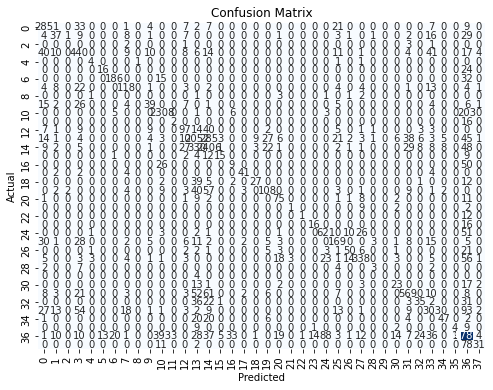

In [16]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
# ROC-AUC Score and Curve

# Calculate probabilities for ROC curve
y_prob = knn.predict_proba(X_test)

In [18]:
# Compute ROC-AUC score (using macro average to handle multiclass)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.88


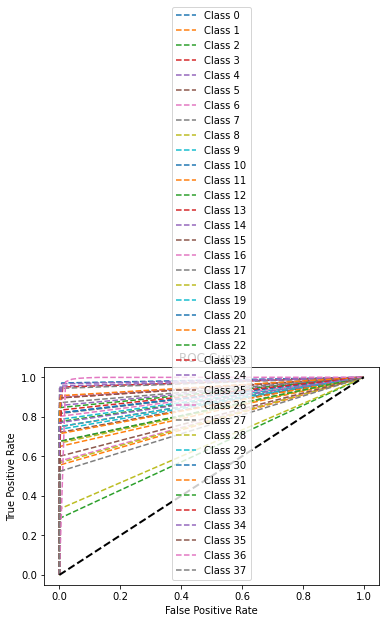

In [19]:
# Plotting ROC Curve for each class
fpr = {}
tpr = {}
thresh = {}
n_class = len(le.classes_)

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i}')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [25]:
 #Model Tuning

# Experimenting with different values of K
k_values = range(1, 21)
accuracies = []



In [ ]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))    

In [ ]:
# Plotting the accuracy for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', color='orange')
plt.title('Accuracy for different K values')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting the accuracy for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', color='orange')
plt.title('Accuracy for different K values')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Define class names
classnames = ['0', '1']  # Modify this list according to your actual classes


In [ ]:
# Compute confusion matrix
confusionmatrix = confusion_matrix(y_train, y_train_predict)

In [ ]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusionmatrix, annot=True, fmt='g', cmap="Greens", 
            xticklabels=classnames, yticklabels=classnames)

# Add titles and labels
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()